    
# Исследование данных о российском кинопрокате
_____
**Заказчик этого исследования — Министерство культуры Российской Федерации.
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Мы также уделим внимание фильмам, которые получили государственную поддержку, и попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.**
    
_____
**Цель исследования.**
    
Изучить, как изменялись сборы фильмов в прокате по годам, рейтингу. Также поискать закономерности в фильмах, финансированных государством.
    
_____
**Задачи исследования.**

Обработать информацию в полученных таблицах, построить графики, чтобы визуализировать данные.
_____
**Исходные данные.**

*Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.*
<br>В таблице находятся следущие колонки:
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

<br>*Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.*
<br>В таблице находятся следущие колонки:
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.
______


**Данное исследование разделим на несколько частей.**
_____

## Шаг 1. 
- *Открыть файлы с данными и объединить их в один датафрейм.*


## Шаг 2. Предобработка данных
- *Объединить данные таким образом, чтобы все объекты из датасета mkrf_movies вошли в получившийся датафрейм.*

### Шаг 2.1. Проверить типы данных
- *Проверить типы данных в датафрейме и преобразовать их там, где это необходимо.*

### Шаг 2.2. Изучить пропуски и дубликаты в датафрейме
- *Объяснить заполнение или незаполнение пропусков.*
- *Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.*

### Шаг 2.3. Изучить категориальные значения
- *Описать общую проблему, встречающуюся почти во всех категориальных столбцах.*

- *Исправить проблемные значения в поле `type`.*

### Шаг 2.4. Проверить количественные значения
- *Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные.*

### Шаг 2.5.  Добавить новые столбцы
- *Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма.*
- *Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из - списка режиссёров и жанров соответственно.*
- *Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.*

## Задача 3. Провести исследовательский анализ данных

- *Посмотреть, сколько фильмов выходило в прокат каждый год.*
- *Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.*
- *Проанализировать, как эта доля менялась по годам.*
- *Сделать вывод о том, какой период полнее всего представлен в данных.*

- *Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной.*
  *С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.*

- *Определить, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.* 
  *Выяснить, фильмы с каким возрастным ограничением собрали больше всего денег в прокате.*
  *Описать, меняется ли картина в зависимости от года, и если да, предположить, с чем это может быть связано.*

##  Задача 4. Исследовать фильмы, которые получили государственную поддержку
_____

- **Открыть файлы с данными и объединить их в один датафрейм.**

Для начала посмотрим, как выглядят датафреймы и информация в них.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
display(shows.head())

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


- **Объединить данные таким образом, чтобы все объекты из датасета mkrf_movies вошли в получившийся датафрейм.**


Выведем информацию о таблицах и типе колонок:

In [4]:
movies.info()
print()
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Чтобы объединить таблицы по совпадающему столбцу, изменим тип `object` столбца `'puNumber'` на `int` -  заменим строковое значение на NaN и удалим эти пропуски, приведем колонку к типу `int`

In [5]:
def convert(val):
    try:
        return int(val)
    except ValueError:
        try:
            return int(float(val))
        except ValueError:
            return float('nan')

movies['puNumber'] = movies['puNumber'].apply(convert)

In [6]:
movies = movies.dropna(subset=['puNumber'])
movies['puNumber'] = movies['puNumber'].astype(int)

Теперь можно объединить таблицы по столбцу `'puNumber'`. Чтобы сохранить все строки из movies, передадим аргумент `left'`:

In [7]:
movies.shape

(7485, 15)

In [8]:
shows.shape

(3158, 2)

In [9]:
movies = movies.merge(shows, on='puNumber', how='left').reset_index()

In [10]:
movies.shape

(7485, 17)

Теперь посмотрим, все ли колонки на месте, и как выглядит таблица:

In [11]:
display(movies.head())
print(movies.info())

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7485 non-null   int64  
 1   title                  7485 non-null   object 
 2   puNumber               7485 non-null   int32  
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

**- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.**

Проверим типы данных в таблице:

In [12]:
movies.dtypes

index                      int64
title                     object
puNumber                   int32
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Сначала преобразуем исходный столбец с датой `show_start_date` в нужный формат

In [13]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format=('%Y-%m-%d %H:%M'))

Также в информации о датафрейме видно, что колонка ratings имеет формат object. скорее всего, в ней имеются строковые значения, найдем все уникальные значения в ней

In [14]:
print(movies['ratings'].unique())
print(movies['ratings'].value_counts(dropna=False))

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']
NaN    966
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
90%      1
64%      1
9.2      1
28%      1
9.1      1
Name: ratings, Length: 95, dtype: int64


Всего 94 строки, и позиции с процентами не на первых местах. Уберём знаки %, так как , например, 98% это не 9.8 рейтинга, а т.н. рейтинг ожидания КиноПоиска. Приведём столбец к типу float. Останется 80 строк из 94.

In [15]:
movies['ratings'] = movies['ratings'].replace('%', '')
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')
movies = movies.drop(index=movies[(movies['ratings'] > 10)].index)
print(movies['ratings'].unique())
print(len(movies['ratings'].value_counts()))

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2 4.7
 4.9 3.9 2.7 3.3 2.9 3.7 1.4 3.1 3.5 3.2 2.8 1.5 2.1 2.5 9.2 3.4 1.1 3.6
 1.  1.3 1.9 1.8 1.2 1.7 9.  8.9 9.1]
80


In [16]:
movies.dtypes

index                                  int64
title                                 object
puNumber                               int32
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

- **Объяснить заполнение или незаполнение пропусков.**
- **Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.**

Посмотрим, в каких столбцах присутствуют пропуски:

In [17]:
print(movies.isna().sum())

index                       0
title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64


Обнаружили пропуски в колонках `film_studio`, `production_country`, `director`, `producer`. В колонках `refundable_support`, `nonrefundable_support`и `budget` - В этих столбцах одинаковое количество пропусков, равное количеству пропусков в столбце `financing_source` — источник государственного финансирования. Скорее всего, это одни и те же фильмы, информацию по которым не предоставили.

Посмотрим, есть ли в датафрейме дубликаты:

In [18]:
print('Количество дубликатов в датафрейме:', movies.duplicated().sum())

Количество дубликатов в датафрейме: 0


In [19]:
print(movies.duplicated(subset='title').sum())
print(movies.duplicated(subset='puNumber').sum())

714
2


Найдены дубликаты нужных столбцах - 714 в `title` и 2 в `puNumber`. Строчки дублируются не полностью, посмотрим, как выглядят эти дубликаты и какие в них различия:

In [20]:
movies.loc[movies['title'].duplicated(keep=False)].sort_values(by='title').head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4851,4851,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5057,5057,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3128,3128,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN


Информация о фильмах дублируется, а прокатные удостоверения и даты выхода разные. В таком количестве - вряд ли это ошибка. 
На портале открытых данных Министерства культуры РФ есть документ о правилах присваивания прокатных удостоверений, где в том числе прописаны пункты о сроках действий удостоверений(1 год), продлении, отзыве, и присваивании дубликатов прокатных удостоверений (п.23) в случае утери. Скорее всего, по той или иной причине прокатные удостоверения были выписаны этим фильмам повторно, тут не надо ничего удалять или заменять.

https://culture.gov.ru/documents/project-document-public-discussions-2008111/

теперь посмотрим на дубликаты в `puNumber`:

In [21]:
movies.loc[movies['puNumber'].duplicated(keep=False)].sort_values(by='title').head(2)

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN
5066,5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN


Также, судя по информации в документе минкультуры, описанном выше, данные в реестр вносит соответствующий сотрудник. Тут видно, что режиссёры и продюссеры немного по-разному вписаны, ну и ошибка в названии - в общем, это всё один и тот же фильм, и человеческий фактор. Эта ошибка не влияет на исследования, не будем ничего тут менять.

Чтобы узнать, какая проблема объединяет категориальные столбцы, выведем информацию о них. Оценим количество уникальных значений:


In [22]:
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [23]:
movies['type'].unique().tolist()

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 ' Художественный',
 ' Анимационный',
 'Музыкально-развлекательный']

In [24]:
movies['film_studio'].unique().tolist()

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
 'Киностудия "Мосфильм"',
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
 'Пульсар Продюксьон, ТФ1 Фильм ',
 'Киностудия "Мосфильм", Телевидение ВНР',
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
 'Фильмове Студио Баррандов',
 'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз, Райзинг Стар, Эндгейм Интертейнмент, Интертейнмент Мэньюфэкчуринг Компани, Р

In [25]:
movies['director'].unique().tolist()

['Кевин Костнер',
 'Е.Матвеев',
 'Тимур Бекмамбетов',
 'В.Абдрашитов',
 'В.Меньшов',
 'Джон Туртурро',
 'Эрик Беснард',
 'В.Титов',
 'Пол Грингросс',
 'М.Туманишвили',
 'Клинт Иствуд',
 'Фернанду Мейрелльеш',
 'Майк Фиггис',
 'А.Салтыков',
 'Г.Данелия',
 'А.Смирнов',
 'Ю.Чулюкин',
 'В.Краснопольский, В.Усков',
 'М.Чиаурели',
 'Лассе Халлстрем',
 'Л.Гайдай',
 'В.Чеботарев',
 'В.Азаров',
 'Боривой Земан',
 'Эндрю Никкол',
 'Г.Мыльников',
 'Джонатан Кинг',
 'И.Бабич',
 'Даниэль Робишо',
 'Грегори Хоблит',
 'Крис Нунан',
 'Стивен Фрирз',
 'Йэн Софтли',
 'Найл Джонсон',
 'Р.Быков',
 'Роб Райнер',
 'Бен Янгер',
 'Роб Маршалл',
 'Е.Ташков',
 'Н.Михалков',
 'Ю.Карасик',
 'А.Тарковский',
 'Джон Франкенхаймер',
 'Оливье Маршал',
 'С.Соловьев',
 'Иоахим Реннинг, Эспен Сандберг',
 'Ролан Быков',
 'Семен Туманов',
 'Питер Сигал',
 'М.Ромм',
 'Г.Полока',
 'Ю.Райзман',
 'Дрю Дэйуолт, Дэвид Шнейдер',
 'С.Самсонов',
 'Айрон Блейз, Роберт Уокер',
 'К.Шахназаров',
 'И.Гостев',
 'Т.Лукашевич',
 'В.Павлови

- **Описать общую проблему, встречающуюся почти во всех категориальных столбцах.**

- **Исправить проблемные значения в поле `type`.**

В некоторых категориальных столбцах есть лишние пробелы в начале или конце элементов. Заполним пропуски строками, чтобы исключить NaN в списке и отсечём лишние пробелы.

In [26]:
movies['director'] = movies['director'].fillna('нет')
movies['genres'] = movies['genres'].fillna('нет')
movies['producer'] = movies['producer'].fillna('нет')

In [27]:
movies['type'] = movies['type'].str.strip()
movies['type'].unique().tolist()

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 'Музыкально-развлекательный']

- **Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные.**

Исследуем три столбца:
- `budget` - общий бюджет фильма
- `refundable_support` - объём возвратных средств государственной поддержки
- `nonrefundable_support` - объём невозвратных средств государственной поддержки


In [28]:
print(movies['budget'].value_counts().head())
print(movies['refundable_support'].value_counts().head())
print(movies['nonrefundable_support'].value_counts().head())
print(movies.isna().sum())

0.00             17
38,000,000.00     6
50,000,000.00     4
80,000,000.00     4
37,142,857.00     3
Name: budget, dtype: int64
0.00             221
20,000,000.00     12
10,000,000.00     10
25,000,000.00     10
5,000,000.00       9
Name: refundable_support, dtype: int64
25,000,000.00    53
30,000,000.00    48
35,000,000.00    29
40,000,000.00    26
20,000,000.00    19
Name: nonrefundable_support, dtype: int64
index                       0
title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                      0
box_office               4327
dtype: int64


Видно, что есть нулевые значения в колонке с общим бюджетом и объемом возвратных средств. По сравнению с общим размером датафрейма, эти нули составляют малую часть. 

- **Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма.**
- **Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из - списка режиссёров и жанров соответственно.**
- **Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.**

Теперь создадим столбец с годом выхода фильма.

In [29]:
movies['show_start_year'] = movies['show_start_date'].dt.year
print(movies['show_start_year'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: show_start_year, Length: 7485, dtype: int64


In [30]:
movies.dtypes

index                                  int64
title                                 object
puNumber                               int32
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
show_start_year                        int64
dtype: object

Добавим столбец со средними значениями по финансированию.

In [31]:
movies['support_percent'] = (movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']
support = movies['support_percent'].median()

print('Медиана доли участия государства составляет:', support)

Медиана доли участия государства составляет: 0.6140376284219444


Напишем функцию, фильтрующую столбцы с фамилиями режиссёров и жанрами по значениям до первой запятой, и добавим эти столбцы в таблицу.

In [32]:
def split(word):
    name = word.split(',')
    return name[0]

movies['director_one'] = movies['director'].apply(split)
print(movies['director_one'].head())

movies['genres_one'] =movies['genres'].apply(split)
print(movies['genres_one'].head())

0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
Name: director_one, dtype: object
0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: genres_one, dtype: object


Найдем фильмы, с бюджетом меньше суммы господдержки:

In [33]:
movies[movies['budget'] < (movies['nonrefundable_support'] + movies['refundable_support'])]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,support_percent,director_one,genres_one
2052,2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,...,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",2014,inf,А.Зайцев,мелодрама
2057,2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,...,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",2015,inf,Р.Прыгунов,драма
2471,2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,"70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",2015,inf,А.Андрианов,боевик
2531,2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,...,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",2015,inf,Д.Штурманова,комедия
2614,2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,...,"100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",2015,inf,М.Фадеев,мультфильм
2683,2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,...,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",2015,inf,М.Местецкий,комедия
2787,2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,...,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",2015,inf,С Чекалов,комедия
2873,2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,...,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",2016,inf,В.Ровенский,комедия
3046,3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,...,"51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",2016,inf,Д.Тюрин,комедия
3564,3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",2016,inf,Ф.Бондарчук,фантастика


Есть 17 фильмов, в которых бюджет меньше господдержки. Так не может быть, данные по какой-то причине не предоставили. Нули в колонке с господдержкой могут говорить о том, что у фильма ее просто не было, поэтому их заменять не нужно. Также много округлённых значений - в некоторых случаях такого не может быть. Кто-то указал суммы, не соответствующие реальным, но мы с этим уже ничего не сделаем.

Заменим пропуски переменной `support`, выводимой ранее:

In [34]:
invalid = movies[movies['budget'] < (movies['refundable_support'] + movies['nonrefundable_support'])]

movies.loc[invalid.index, 'budget'] = (movies.loc[invalid.index, 'refundable_support'] +
movies.loc[invalid.index, 'nonrefundable_support']) / support

movies.loc[invalid.index]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,support_percent,director_one,genres_one
2052,2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,...,"23,000,000.00","37,456,987.87","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",2014,inf,А.Зайцев,мелодрама
2057,2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,...,"75,000,000.00","122,142,351.75",Фонд кино,6.60,драма,"446,163,511.00",2015,inf,Р.Прыгунов,драма
2471,2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,"70,000,000.00","130,285,175.20",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",2015,inf,А.Андрианов,боевик
2531,2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,...,0.00,"32,571,293.80",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",2015,inf,Д.Штурманова,комедия
2614,2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,...,"100,000,000.00","260,570,350.41",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",2015,inf,М.Фадеев,мультфильм
2683,2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,...,"59,000,000.00","96,085,316.71",Фонд кино,6.30,"комедия,драма","1,957,738.51",2015,inf,М.Местецкий,комедия
2787,2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,...,"35,000,000.00","56,999,764.15",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",2015,inf,С Чекалов,комедия
2873,2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,...,"6,000,000.00","9,771,388.14",Министерство культуры,4.30,комедия,"15,362,931.43",2016,inf,В.Ровенский,комедия
3046,3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,...,"51,000,000.00","113,999,528.30",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",2016,inf,Д.Тюрин,комедия
3564,3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,...,"250,000,000.00","407,141,172.51",Фонд кино,5.60,фантастика,"1,038,321,489.00",2016,inf,Ф.Бондарчук,фантастика


Нули в колонке с бюджетом заполнены.

In [35]:
movies['budget'].value_counts()

38,000,000.00     6
80,000,000.00     4
50,000,000.00     4
40,000,000.00     3
38,500,000.00     3
                 ..
46,160,000.00     1
42,860,000.00     1
69,883,049.00     1
69,428,728.00     1
150,147,502.00    1
Name: budget, Length: 304, dtype: int64

___
**Исследовательский анализ данных**
- Посмотреть, сколько фильмов выходило в прокат каждый год.
- Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
- Проанализировать, как эта доля менялась по годам.
- Сделать вывод о том, какой период полнее всего представлен в данных.

- Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной.
  С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.

- Определить, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. 
  Выяснить, фильмы с каким возрастным ограничением собрали больше всего денег в прокате.
  Описать, меняется ли картина в зависимости от года, и если да, предположить, с чем это может быть связано.


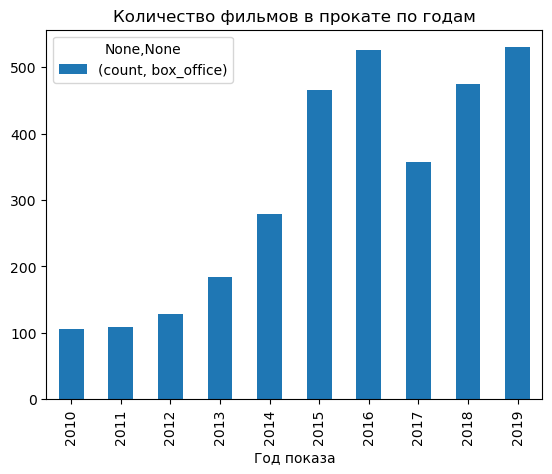

In [36]:
movies_pivot_count = movies.pivot_table(index='show_start_year', values = 'box_office', aggfunc = ['count'])
movies_pivot_count.plot(title='Количество фильмов в прокате по годам', kind='bar', xlabel='Год показа');

По графику видно, что количество прокатных фильмов в 2016 и в 2019 году достигло максимальных значений. Ниже всего показатели в 2013 году.

Чтобы посчитать отношение прокатных фильмов ко всем остальным, поделим количество фильмов с информацией о сборах на количество всех позиций таблицы.

In [37]:
movies['box_office'].count()

3158

In [38]:
movies['puNumber'].count()

7485

In [39]:
movies_mean = movies['box_office'].count() / movies['puNumber'].count()
print('Доля фильмов, представленных в прокате:', movies_mean )

Доля фильмов, представленных в прокате: 0.42191048764195055


Изучим, как менялась динамика по годам:

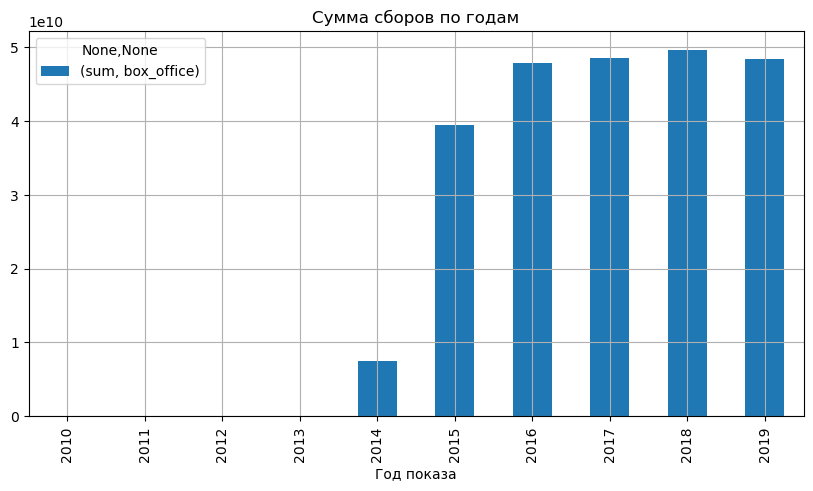

In [40]:
movies_pivot = movies.pivot_table(index='show_start_year', values = 'box_office', aggfunc = ['sum'])
movies_pivot.plot(title='Сумма сборов по годам', kind='bar', grid=True, xlabel='Год показа', figsize=(10,5));
plt.xlim=(2013, 2019)

Видно, что минимальную сумму фильмы, представленные в прокате, заработали в 2014г, а максимальную - в 2018.

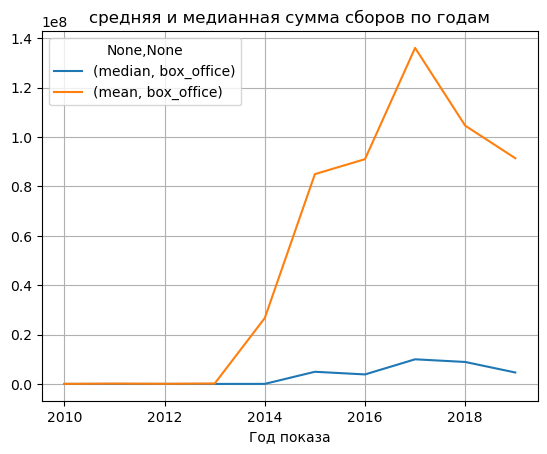

In [41]:
mm_year_pivot = movies.pivot_table(index ='show_start_year', values='box_office', aggfunc=['mean','median']);
mm_year_pivot.plot(title='средняя и медианная сумма сборов по годам',
                   kind='line', grid=True,
                   y=['median', 'mean'], xlabel='Год показа');

Построим график с данными по возрастным ограничениям и сумме сборов по годам:

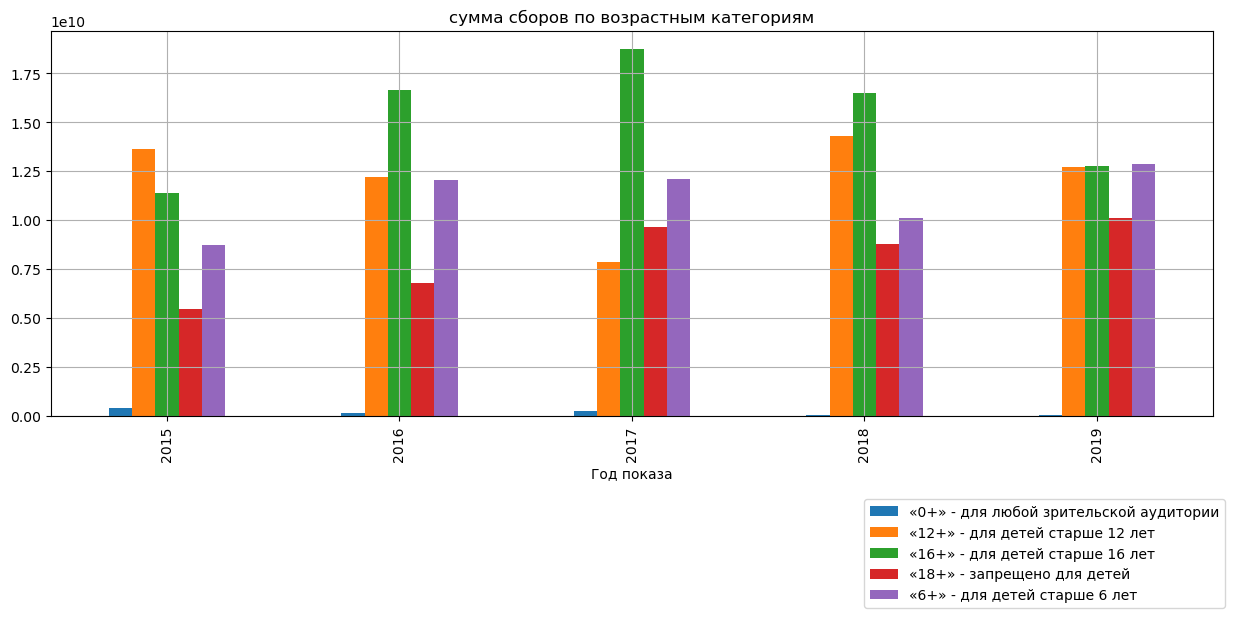

In [53]:
ages_pivot = movies.loc[movies['show_start_year'] > 2014]\
.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')
ages_pivot.plot(
    title='сумма сборов по возрастным категориям', 
    kind='bar', 
    xlabel='Год показа', 
    grid=True, 
    figsize=(15,5), 
    xlim=(2015, 2019));
plt.legend(bbox_to_anchor=(0.7, -0.5), loc='lower left', borderaxespad=0);

- По графику видно что самые большие суммы собрали фильмы с рейтингом 16+ в 2017 году.
  На втором месте рейтинг 12+ в 2018г. Фильмы 6+ и 18+ не имеют сильных пиковых значений для своих категорий.
  Почему в 2017 году был такой скачок у подросткового кино? Возможно, виной тому обилие кассовых фильмов, снятых по комиксам,     или супергеройской франшизы, вышедших в тот год. Усредненные значения почти по всем категориям в 2019 году скорее всего         обусловлены пандемией ковида.

**Исследование фильмов, которые получили государственную поддержку**

Посчитаем окупаемость и неокупаемость фильмов, прибыльность и общую сумму поступивших средств

In [43]:
movies['all_support'] = movies['refundable_support'] + movies['nonrefundable_support']
movies['gain'] = movies['box_office'] / movies['all_support'] - 1
movies['yes_pay'] = movies['gain'] > 0
movies['no_pay'] = ~movies['yes_pay']

Построим график по окупившимся и неокупившимся жанрам

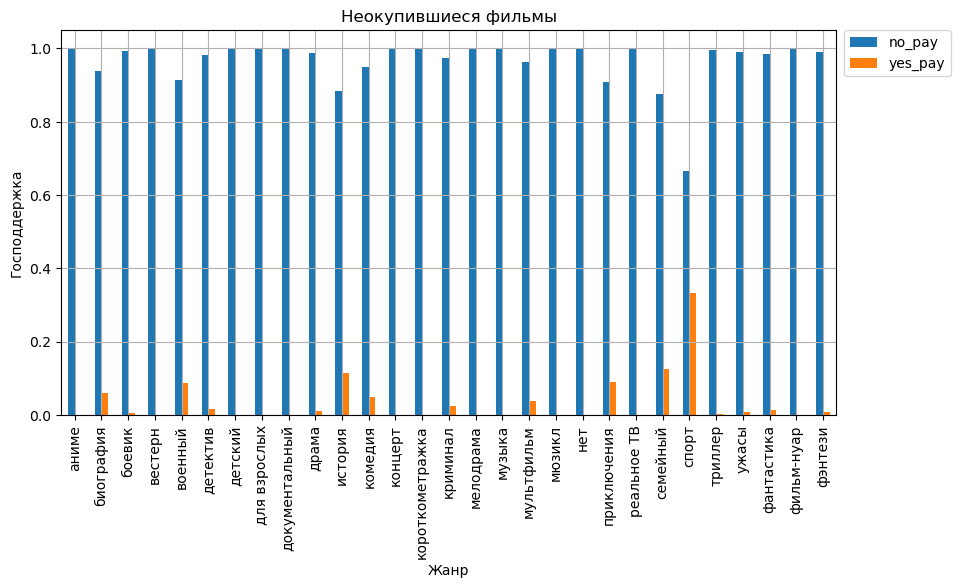

In [44]:
genres_no = movies.pivot_table(index ='genres_one', values=['yes_pay','no_pay'])
genres_no.plot(title='Неокупившиеся фильмы', kind='bar', ylabel='Господдержка', xlabel='Жанр', grid=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0);

Среди окупившихся Российских фильмов естественно лидируют спортивные и семейные фильмы. Остальные жанры практически не окупаются.

Для начала, посмотрим в какие годы поступило в среднем больше всего государственных средств: 

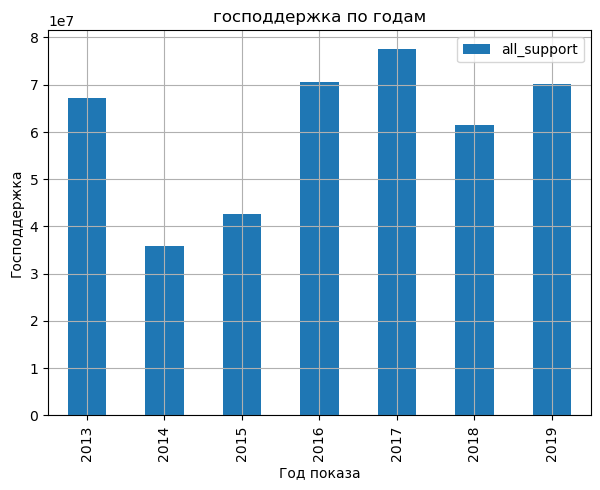

In [45]:
studio_pivot = movies.pivot_table(index ='show_start_year', values='all_support')
studio_pivot.plot(title='господдержка по годам', kind='bar', ylabel='Господдержка', xlabel='Год показа', grid=True, figsize=(7,5));

Видно, что с 2014 до 2017 года объемы средств растут. Далее 2018 и 2019 годы близки к средним значениям.

Отсортируем фильмы по рейтингу:

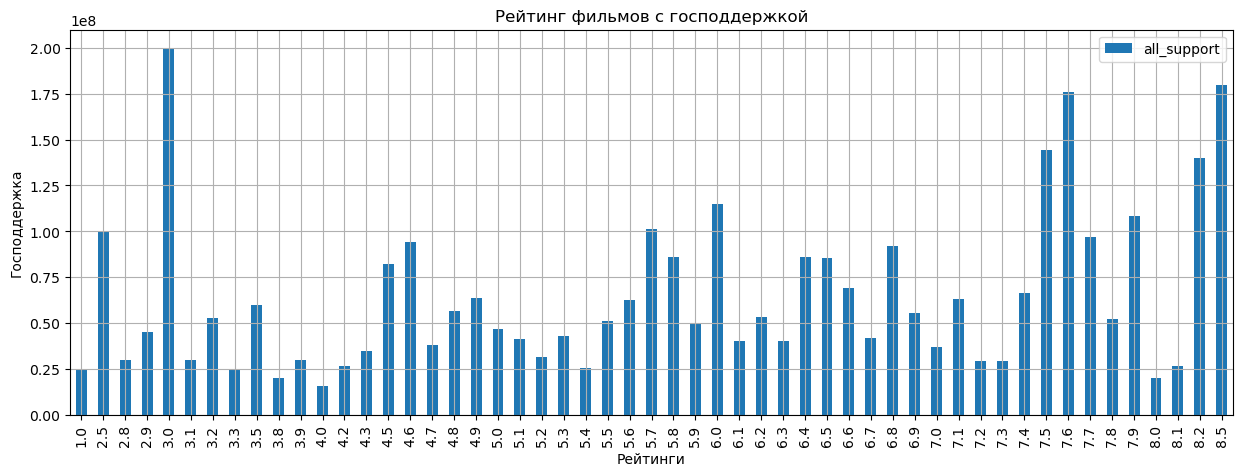

In [46]:
rating_pivot = movies.pivot_table(index ='ratings', values='all_support')
rating_pivot.plot(
    title='Рейтинг фильмов с господдержкой', 
    kind='bar', 
    xlabel='Рейтинги',
    ylabel='Господдержка',
    grid=True, 
    figsize=(15,5), 
);

Видно, что чаще всего фильмы, но которые идут гос.средства, собирают всего 3 балла из 10.

Теперь попробуем узнать, есть ли зависимость бюджета фильма от объёма выделяемых и невозвратных средств:

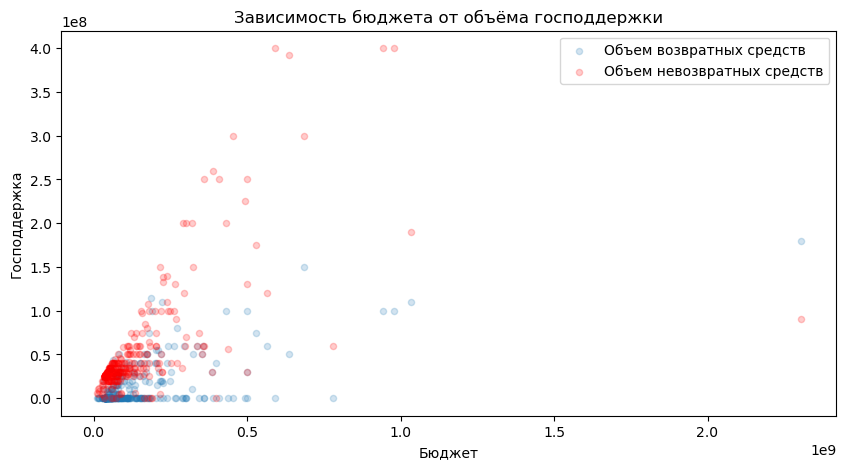

In [47]:
#построим две диаграммы рассеяния с нужными параметрами, и соединим их. Устрановим прозрачность 0.2
ax = movies.plot.scatter(
    title='Зависимость бюджета от объёма господдержки',
    label='Объем возвратных средств',
    ylabel='Господдержка',
    x='budget',
    y='refundable_support',
    alpha=0.2,
    figsize=(10,5),
    
);

movies.plot.scatter(
    label='Объем невозвратных средств',
    x='budget',
    y='nonrefundable_support',
    ylabel='Господдержка',
    xlabel='Бюджет',
    color='red',
    alpha=0.2,
    figsize=(10,5),
    ax=ax);

Проглядывается небольшая положительная зависимость бюджета фильма от объема средств господдержки. Но в целом, фильмы практически не окупаются.

Отсортируем список наиболее часто встречающихся режиссеров в датафрейме, и сделаем срез с этим списком в таблице, и построим график по самым проспонсированным режиссерам.

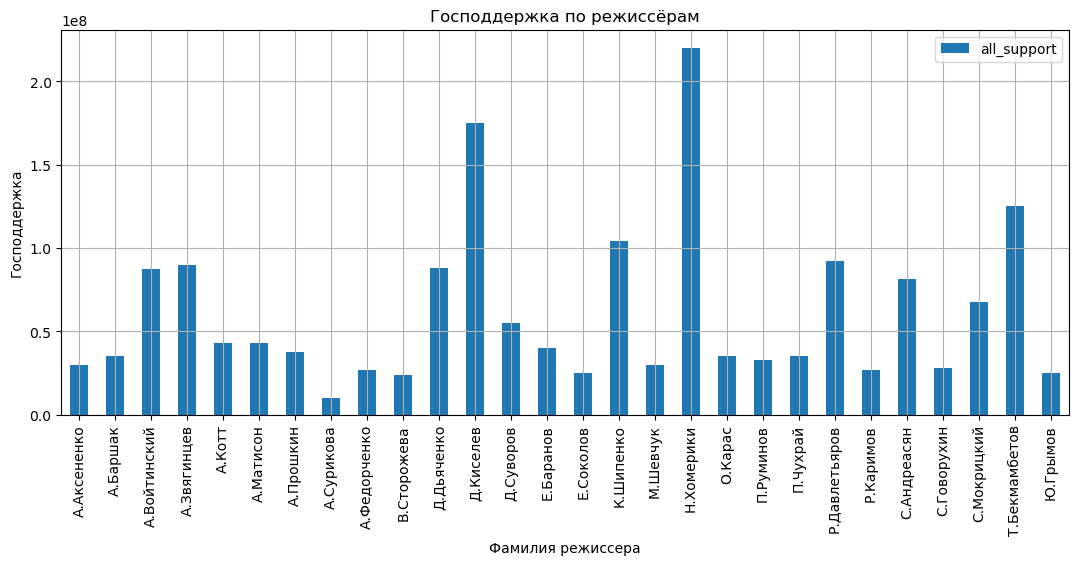

In [48]:
dir_top = movies['director_one'].value_counts().index.tolist()[:300]
dir_pivot = movies.query('director_one in @dir_top').pivot_table(index='director_one', values='all_support')
dir_pivot.plot(title='Господдержка по режиссёрам',
               kind='bar', ylabel='Господдержка',
               xlabel='Фамилия режиссера', grid=True, figsize=(13,5));

Выше всех в рейтинге Н.Хомерики, Д.Киселёв, Тодоровский, и Бекмамбетов.

Попробуем проследить связь всех поступающих средств и жанра фильмов:

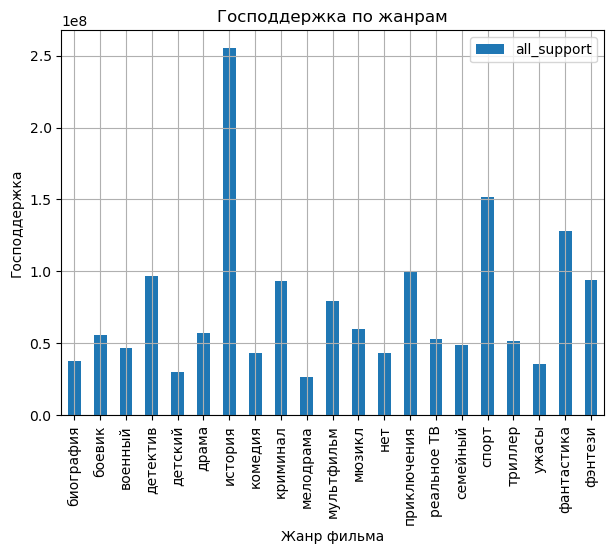

In [49]:
genres_pivot = movies.pivot_table(index ='genres_one', values='all_support')
genres_pivot.plot(title='Господдержка по жанрам',
                  kind='bar', ylabel='Господдержка', xlabel='Жанр фильма',
                  grid=True, figsize=(7,5));

Видно что в среднем больше всего тратится на исторические фильмы, на втором месте спорт, мюзиклы и фентези.

Оценим, на картины какой категории больше всего тратится бюджет:

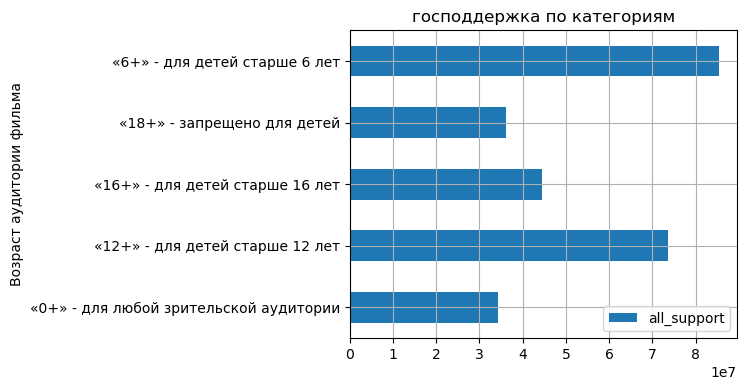

In [50]:
age_pivot = movies.pivot_table(index ='age_restriction', values='all_support')
age_pivot.plot(title='господдержка по категориям', kind='barh',
               ylabel='Господдержка', xlabel='Возраст аудитории фильма',
               grid=True, figsize=(5,4));

Видно, что наибольшие значения у фильмов с рейтингом 6+, далее следуют картины 12+. Меньше всего бюджета выделяют на фильмы с рейтингом 0+ и 18+.

Построим график по типам фильмов

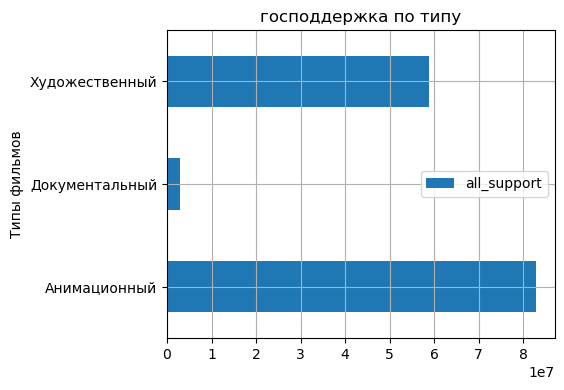

In [51]:
pivot_type = movies.pivot_table(index='type', values='all_support')
pivot_type.plot(title='господдержка по типу', kind='barh',
                ylabel='Господдержка', xlabel='Типы фильмов',
                grid=True, figsize=(5,4));

Хоть в колонке  сохранились все типы фильмов после нашей обработки, выходит, бюджет тратился только на художественные, анимационные и документальные фильмы. 

### Шаг 5. Напишите общий вывод

**Мы поработали с данными, опубликованными на портале открытых данных Министерства культуры, изучили рынок российского кинопроката и выявили некоторые закономерности. Также уделили внимание фильмам, которые получили государственную поддержку. 
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.**

* Общая сумма сборов проката была выше всего в 2018 году. Но в 2017 году количество выпускаемых фильмов максимальное, соответсвенно, этот год лидирует по средним и медианным значениям по сборам. Проглядывается закономерность связи с графиком рейтинга сборов по возрастному рейтингу - максимальные значения по картинам 16+ в 2017 году. Такой скачок был вызван большим количеством качественных зарубежных приключенческих и супергеройских фильмов, вышедших в 2017 году. К 2019 году сборы по всем категориям усреднились - все сидели дома во время изоляции.

**Подводя общий итог по информации о фильмах, на которые выделялся государственный бюджет, можно выделить несколько заметных моментов.**
* Больше всего на финансирование фильмов было потрачено в 2017 году
* В основном средства идут на исторические и спортивные фильмы. Скорее всего это фильмы о войне, также был прирост российских спортивных фильмов.
* Картины, на которые тратится государственный бюджет, по рейтингам набирают чаще всего 3 из 10. 
* Государственная поддержка не способствует повышению популярности фильмов.
* Чаще профинансированные государством фильмы зарабатывают рейтинг 3 из 10, чуть реже - 7 из 10, по данным КиноПоиска. Показатели окупаемости выше всего у семейных и спортивных картин. Средства, потраченные на финансирование, практически не окупаются.
* Что касается режиссёров, то в топах по финансированию у нас  Н.Хомерики - лауреата многих российских и европейских кинофестивалей. Фамилии Д.Киселёва, Тодоровского и Бекмамбетова в топах по финансированию тоже очевидны.

Также поначалу заинтересовали низкие показатели по всей информации 2013 года. Скорее всего это обусловлено тем, что в 2013м году Кинопоиск был куплен компанией "Яндекс".
